# Agglomerative Clustering 层次聚类算法

## 读取源数据

In [1]:
import pandas as pd
import numpy as np

In [2]:
#读取源数据
data = pd.read_excel("../DataSource/result.xlsx")

## 构建距离矩阵并聚类

In [3]:
# 去除 'source ID' 列
data = data.drop('source ID', axis=1)

In [4]:
print(data)

     T1548  T1548.002  T1548.004  T1548.001  T1548.003  T1134  T1134.002  \
0        0          0          0          0          0      0          0   
1        0          0          0          0          0      0          0   
2        0          0          0          0          0      0          0   
3        0          0          0          0          0      0          0   
4        0          0          0          0          0      0          0   
..     ...        ...        ...        ...        ...    ...        ...   
125      0          0          0          0          0      0          0   
126      0          0          0          0          0      0          0   
127      0          0          0          0          0      0          0   
128      0          0          0          0          0      0          0   
129      0          0          0          0          0      0          0   

     T1134.003  T1134.004  T1134.005  ...  T1497.002  T1600  T1600.002  \
0            

In [5]:
n = data.shape[0]  # 数据集中样本点的数量
d = data.shape[1]  # 数据集中每个样本点的维度
print(n,d)

130 594


In [14]:
from scipy.cluster import hierarchy

# 准备数据，假设您的数据存储在变量data中

# 计算距离矩阵
distance_matrix = hierarchy.distance.pdist(data)

In [10]:
# 进行层次聚类
linkage = hierarchy.linkage(distance_matrix, method='average')

# 根据需求选择聚类数目，设置阈值
threshold = 5.0 # 示例阈值

# 获取聚类结果
clusters = hierarchy.fcluster(linkage, threshold, criterion='distance')

# 生成聚类标签
clustering_labels = np.array([f'Cluster {label}' for label in clusters])

# 获取聚类中心
clustering_center = np.mean(data, axis=0)

In [11]:
# 打印聚类结果
print(clusters)

[  8  67  52  14  36  41  46 122 124  85  12 116  84  89 115 106 112  19
  63  34  44  99  56  86  49  12  57  80  30 114  60  94  45  35  39  43
  68  82  42 109  75 107  11  69  73  61  31  78  40  91  98  87  10 100
  76  24  51  16 104  62  15  96  93  83  59  23  81  97 120 119 123  47
  74 102   5 108  12  11   7  38 103 101  65  18 105  12  64  29  77  79
  12   3  17  28   6 113 118  10   1   2  72  88  37  33  53  66  21  13
  90  54  71 121  22  32 111  20  48  50  92 117  58   9  25  27  55  26
 110  70   4  95]


In [12]:
# 打印聚类结果和聚类中心
print("Clustering Labels:", clustering_labels)
print("Clustering Center:", clustering_center)

Clustering Labels: ['Cluster 8' 'Cluster 67' 'Cluster 52' 'Cluster 14' 'Cluster 36'
 'Cluster 41' 'Cluster 46' 'Cluster 122' 'Cluster 124' 'Cluster 85'
 'Cluster 12' 'Cluster 116' 'Cluster 84' 'Cluster 89' 'Cluster 115'
 'Cluster 106' 'Cluster 112' 'Cluster 19' 'Cluster 63' 'Cluster 34'
 'Cluster 44' 'Cluster 99' 'Cluster 56' 'Cluster 86' 'Cluster 49'
 'Cluster 12' 'Cluster 57' 'Cluster 80' 'Cluster 30' 'Cluster 114'
 'Cluster 60' 'Cluster 94' 'Cluster 45' 'Cluster 35' 'Cluster 39'
 'Cluster 43' 'Cluster 68' 'Cluster 82' 'Cluster 42' 'Cluster 109'
 'Cluster 75' 'Cluster 107' 'Cluster 11' 'Cluster 69' 'Cluster 73'
 'Cluster 61' 'Cluster 31' 'Cluster 78' 'Cluster 40' 'Cluster 91'
 'Cluster 98' 'Cluster 87' 'Cluster 10' 'Cluster 100' 'Cluster 76'
 'Cluster 24' 'Cluster 51' 'Cluster 16' 'Cluster 104' 'Cluster 62'
 'Cluster 15' 'Cluster 96' 'Cluster 93' 'Cluster 83' 'Cluster 59'
 'Cluster 23' 'Cluster 81' 'Cluster 97' 'Cluster 120' 'Cluster 119'
 'Cluster 123' 'Cluster 47' 'Cluster 74' 'Clu

## 评估

### 轮廓系数

In [18]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data, clustering_labels)
print(silhouette_avg)

0.01576555822815361


#### Dumn指数和DB指数

In [20]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
import numpy as np

# 计算样本间的距离矩阵
distance_matrix = pairwise_distances(data)

# 计算类别内的最小距离
min_distances = np.min(distance_matrix[np.nonzero(distance_matrix)])

# 计算类间的最大距离
max_distances = np.max(distance_matrix)

# 计算Dunn指数
dunn_index = min_distances / max_distances

# 计算DB指数
db_index = davies_bouldin_score(data, clusters)

# 打印指数
print("Dunn Index:", dunn_index)
print("DB Index:", db_index)

Dunn Index: 0.12309149097933274
DB Index: 0.32871999547509245


#### 霍普金斯Hopkins statics统计方法

In [13]:
from sklearn.neighbors import NearestNeighbors

def hopkins(X):
    n = X.shape[0]  # 数据集中样本点的数量
    d = X.shape[1]  # 数据集中每个样本点的维度

    # 计算样本点之间的距离矩阵
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
    distances, _ = nbrs.kneighbors(X)
    rand_X = np.random.uniform(low=X.min(axis=0), high=X.max(axis=0), size=(n, d))

    # 计算样本点与随机点之间的距离矩阵
    nbrs_rand = NearestNeighbors(n_neighbors=1).fit(rand_X)
    rand_distances, _ = nbrs_rand.kneighbors(rand_X)

    # 计算Hopkins统计量
    u = distances.sum()
    w = rand_distances.sum()
    hopkins_statistic = u / (u + w)

    return hopkins_statistic

In [50]:
# 根据聚类标签提取每个聚类的样本点
cluster_samples = []
unique_labels = np.unique(clustering_labels)
for label in unique_labels:
    samples = clusters[np.where(cluster_labels == label)]
    cluster_samples.append(samples)

In [ ]:
# 计算每个聚类的Hopkins统计量
hopkins_scores = []
for samples in cluster_samples:
    score = hopkins(samples)
    hopkins_scores.append(score)

# 打印每个聚类的Hopkins统计量
for i, score in enumerate(hopkins_scores):
    print("Cluster", unique_labels[i], "Hopkins Statistic:", score)

# 计算总体Hopkins统计量（可选）
total_hopkins_score = np.mean(hopkins_scores)
print("Total Hopkins Statistic:", total_hopkins_score)

## 可视化

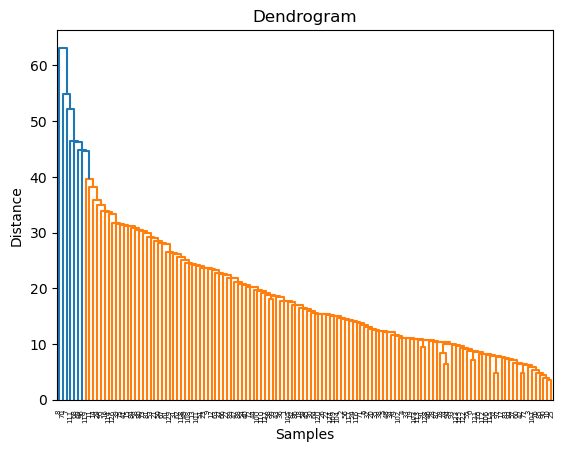

In [9]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

# 计算距离矩阵
distance_matrix = hierarchy.distance.pdist(data)

# 进行层次聚类
linkage = hierarchy.linkage(distance_matrix, method='average')

# 绘制树状图
dendrogram = hierarchy.dendrogram(linkage)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()